In [2]:
import numpy as np
import pandas as pd

import matplotlib as plt 
import seaborn as sns 

import statsmodels

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

## EDA on the UCI dataset

In [3]:
#loading the dataset
#used leena's code for this:)
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

df1_raw = X.assign(Target=y.get('Target'))
df1_raw.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [20]:
dropout_df = df1_raw[df1_raw['Target']=='Dropout']
enrolled_df = df1_raw[df1_raw['Target']=='Enrolled']
Graduate_df = df1_raw[df1_raw['Target']=='Graduate']
Graduate_df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1,1,1,9070,1,1,132.0,1,1,1,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,Graduate
4418,1,44,1,9070,1,39,120.0,1,3,38,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,Graduate
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


This dataset does not have any missing value.

## Exploring the 'target' distribution:
1) with the raw dataset
2) with the dataset excluding individuals that do not go to college at a normal age (age of 18-22)

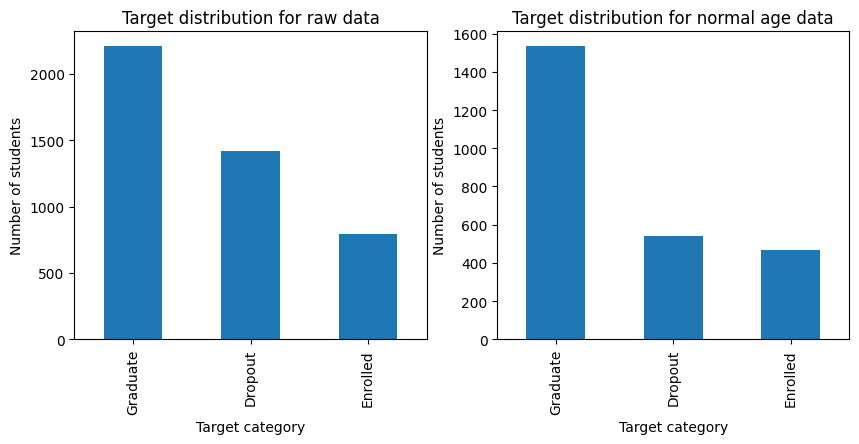

In [4]:
import matplotlib.pyplot as plt

# Set the overall figure size
plt.figure(figsize=(10, 4))  # Width, height in inches

# Define the first subplot
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
raw_target = df1_raw['Target'].value_counts()
raw_target.plot(kind='bar')
plt.title('Target distribution for raw data')
plt.xlabel('Target category')
plt.ylabel('Number of students')

# Define the second subplot
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
df_normal_age = df1_raw[(df1_raw['Age at enrollment']>=18) & (df1_raw['Age at enrollment']<=20)]
normal_age_target = df_normal_age['Target'].value_counts()
normal_age_target.plot(kind='bar')
plt.title('Target distribution for normal age data')
plt.xlabel('Target category')
plt.ylabel('Number of students')

# Show the complete figure with all subplots
plt.show()


## Dropout Rate and Age

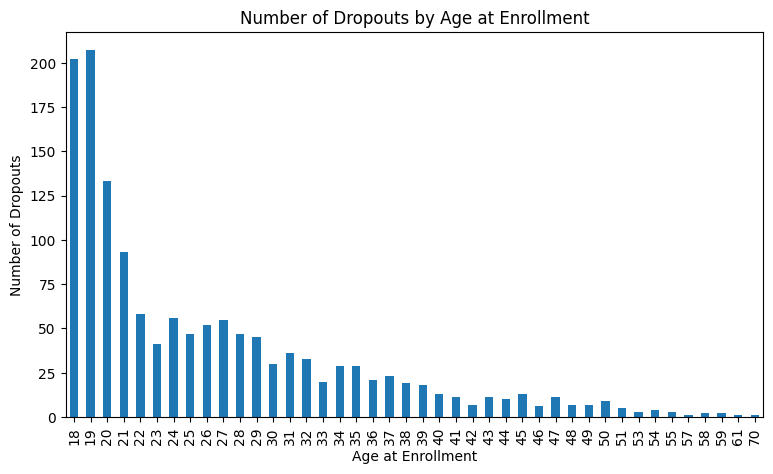

In [5]:

dropout_df = df1_raw[df1_raw['Target'] == 'Dropout']
dropout_age_counts = dropout_df.groupby('Age at enrollment').size()

# Create a bar plot
plt.figure(figsize=(9,5))
dropout_age_counts.plot(kind='bar')
plt.title('Number of Dropouts by Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Number of Dropouts')
plt.show()

- There are total of 1421 dropouts.
- 542 of them are between age of 18-22 (roughly 38%). The rest 62% are not at the normal age.
- Age 19 has the highest numbers of drop out among all ages 

## Female and Male dropout rates

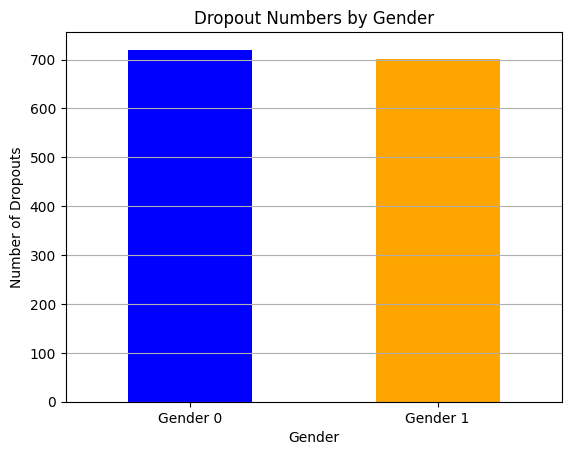

In [6]:
# Plotting with numbers on the bars
# Plotting with numbers on the bars
import matplotlib.pyplot as plt

# Filtering data for 'Dropout' status
dropout_data = df1_raw[df1_raw['Target'] == 'Dropout']

# Counting dropouts by gender
dropout_counts_by_gender = dropout_data['Gender'].value_counts().sort_index()

# Plotting
plt.figure()
dropout_counts_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Dropout Numbers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Dropouts')
plt.xticks(ticks=[0, 1], labels=['Gender 0', 'Gender 1'], rotation=0)
plt.grid(axis='y')

plt.show()
#gender0: female, gender1: male

## Parent's Qualification (Education level)

Text(0.5, 1.0, "Mother's education level for dropouts")

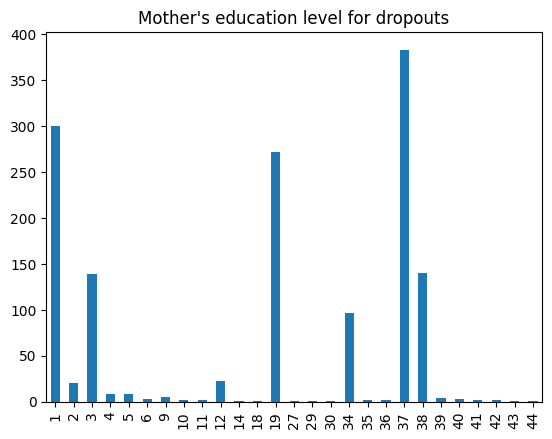

In [7]:

plt.figure()
mother_common = dropout_df["Mother's qualification"].value_counts()
dropout_df["Mother's qualification"].value_counts().sort_index().plot(kind='bar')
plt.title("Mother's education level for dropouts")

Most Common education level for **dropout's mother**: 
- 37: Basic education 1st cycle (4th/5th year) or equiv.
- 1: Secondary Education 
- 19: Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
- 38: Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 
- 3: Higher Education - Degree

Text(0.5, 1.0, "Father's education level for dropouts")

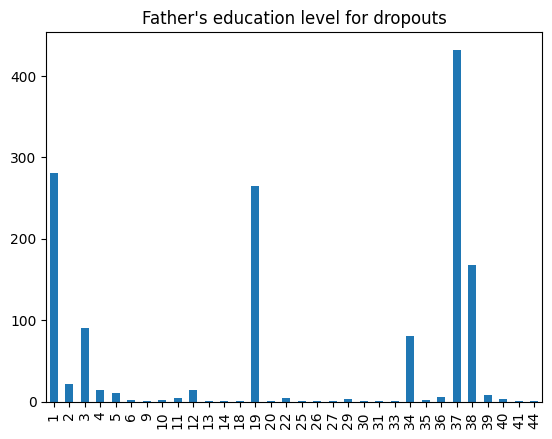

In [8]:

plt.figure()
dropout_df["Father's qualification"].value_counts().sort_index().plot(kind='bar')
plt.title("Father's education level for dropouts")


In [9]:
father_common = dropout_df["Father's qualification"].value_counts()



Most Common education level for **dropout's father**: (**Same as Mother**)
- 37: Basic education 1st cycle (4th/5th year) or equiv.
- 1: Secondary Education 
- 19: Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
- 38: Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 
- 3: Higher Education - Degree

## Each target categories' mean admission score

In [24]:
dropout_df['Admission grade'].mean(),Graduate_df['Admission grade'].mean(),enrolled_df['Admission grade'].mean()

(124.96136523574945, 128.79443186962428, 125.53425692695214)

People who drop out seems to have a smaller admission score, but not too much. People who graduated have the highest admission score.